In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans 
# from sklearn.mixture import GaussianMixture as GMM
from collections import defaultdict
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score,mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection
from itertools import product
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Load Visualization packages
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.stats import kurtosis,entropy

import time

In [2]:
from tqdm import tqdm
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss, classification_report
from sklearn.model_selection import train_test_split

In [4]:
import os
save_folder = "../figures/clustering/"
os.path.isdir(save_folder)

True

## Prepare the dataset : Heart Disease

In [5]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

In [6]:
# creating a copy of df
df1_copy = df

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
x = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]
# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
x[continuous_features] = scaler.fit_transform(x[continuous_features])
x = x.values
y = y.squeeze()

## Digists 

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
y_data = digits.target

## Experiments 

## KMean

distortion


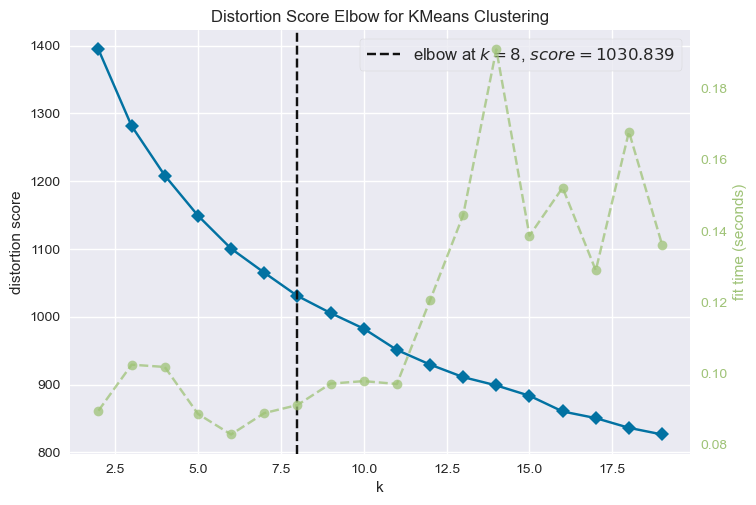

silhouette


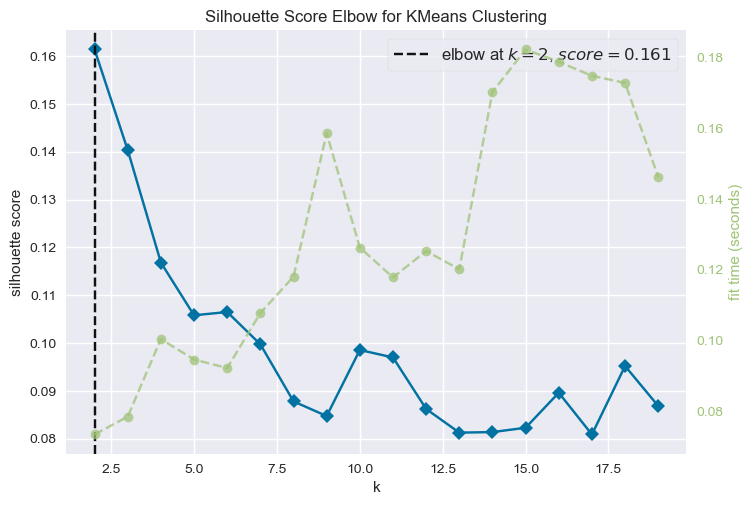

calinski_harabasz


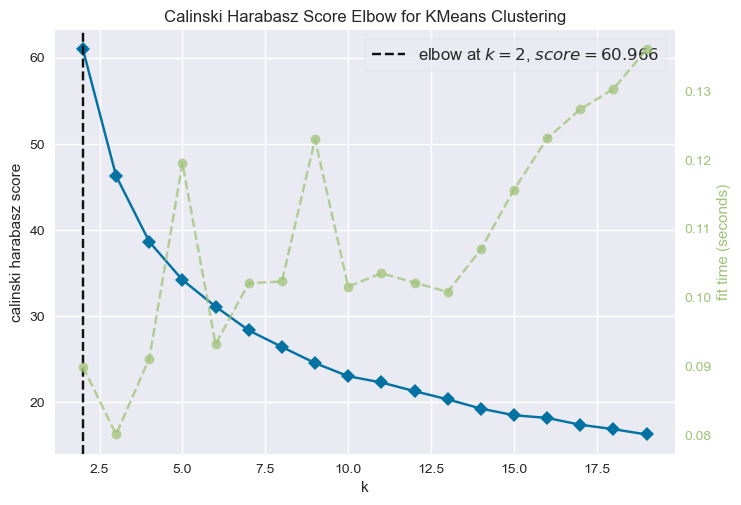

In [24]:
kmeans = KMeans(random_state=42)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = True)
    visualizer.fit(x)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"heart_elbow_{}.png".format(i))
#     plt.close()

distortion


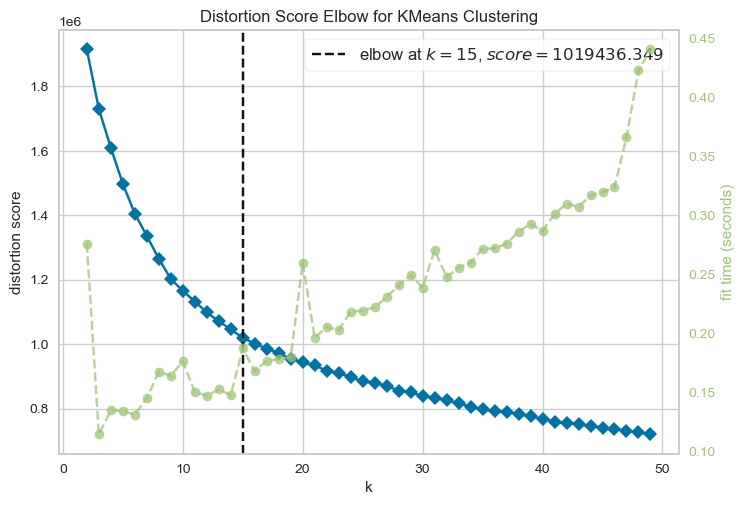

silhouette


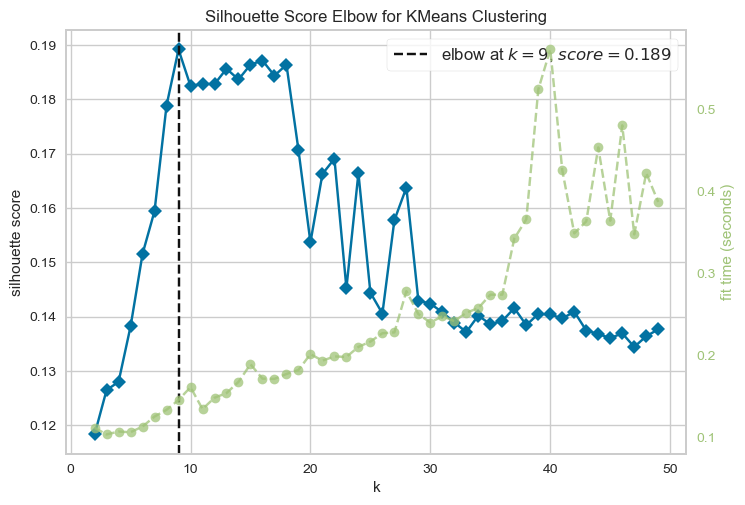

calinski_harabasz


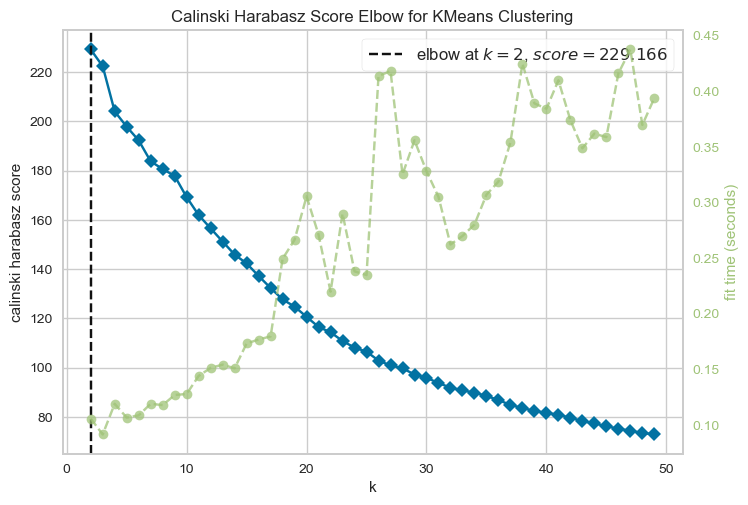

In [170]:
kmeans = KMeans(random_state=42)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(kmeans, k=(2,50), metric = i, timings = True)
    visualizer.fit(data)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"Mnist_elbow_{}.png".format(i))
#     plt.close()

In [130]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c).fit(x)
    homo[i] = homogeneity_score(y,km.predict(x))
    comp [i] = completeness_score(y,km.predict(x))
    adjust_mut_info[i] = ami(y,km.predict(x))
    



20it [00:02,  7.62it/s]


Text(0, 0.5, 'Score')

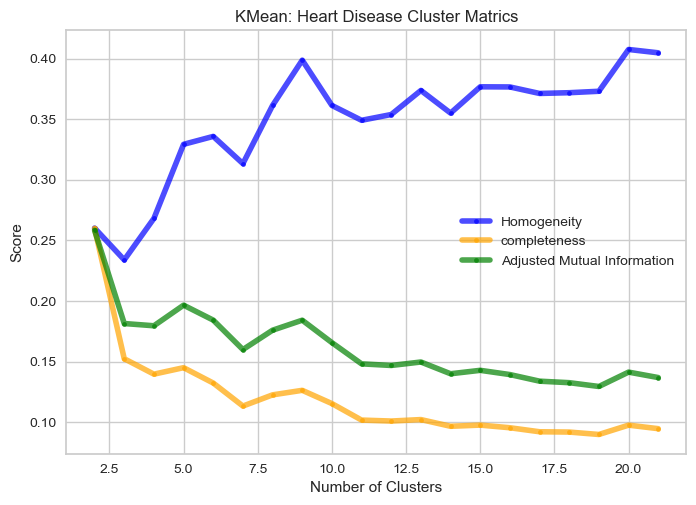

In [132]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Heart Disease Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

In [133]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c).fit(data)
    homo[i] = homogeneity_score(y_data,km.predict(data))
    comp [i] = completeness_score(y_data,km.predict(data))
    adjust_mut_info[i] = ami(y_data,km.predict(data))
    



20it [00:04,  4.88it/s]


Text(0, 0.5, 'Score')

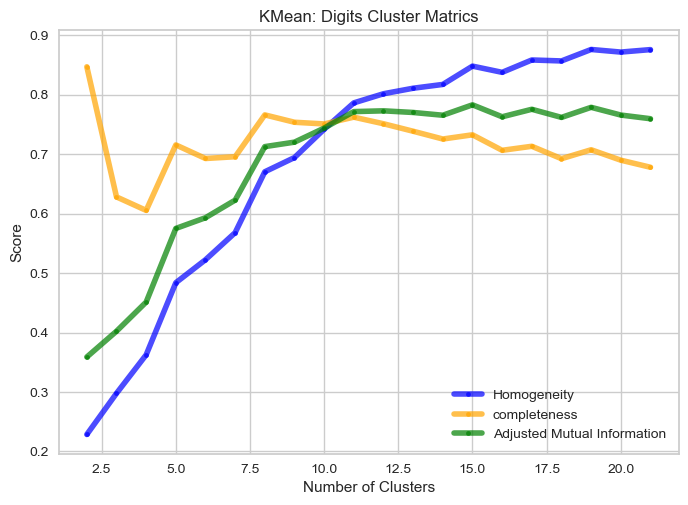

In [135]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Digits Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

In [11]:
# model = KMeans(n_clusters=2, random_state=42)
# visualizer = InterclusterDistance(model, random_state=42)

# visualizer.fit(x)        # Fit the data to the visualizer
# visualizer.show()
# # plt.title("TSNE - Visualization of K-Means clusters - TMDB", fontsize=15)

## EM

In [149]:
from sklearn.base import ClusterMixin
from sklearn.mixture import GaussianMixture

class GaussianMixtureCluster(GaussianMixture, ClusterMixin):
    """Subclass of GaussianMixture to make it a ClusterMixin."""

    def fit(self, X):
        super().fit(X)
        self.labels_ = self.predict(X)
        return self

    def get_params(self, **kwargs):
        output = super().get_params(**kwargs)
        output["n_clusters"] = output.get("n_components", None)
        return output

    def set_params(self, **kwargs):
        kwargs["n_components"] = kwargs.pop("n_clusters", None)
        return super().set_params(**kwargs)


distortion


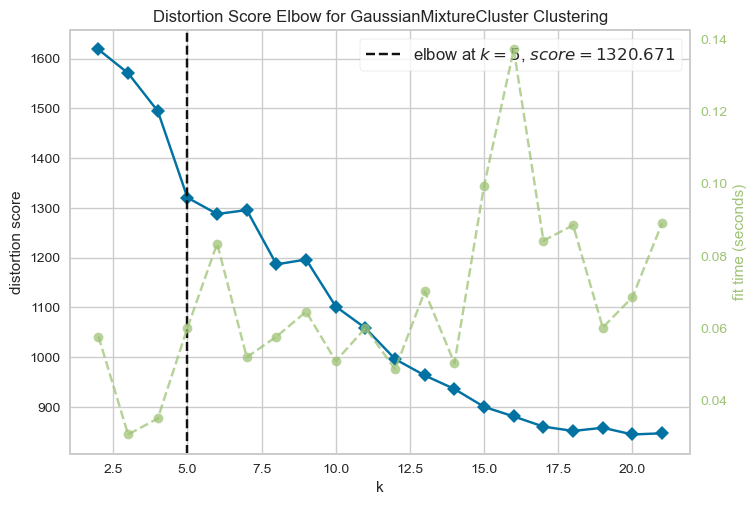

silhouette


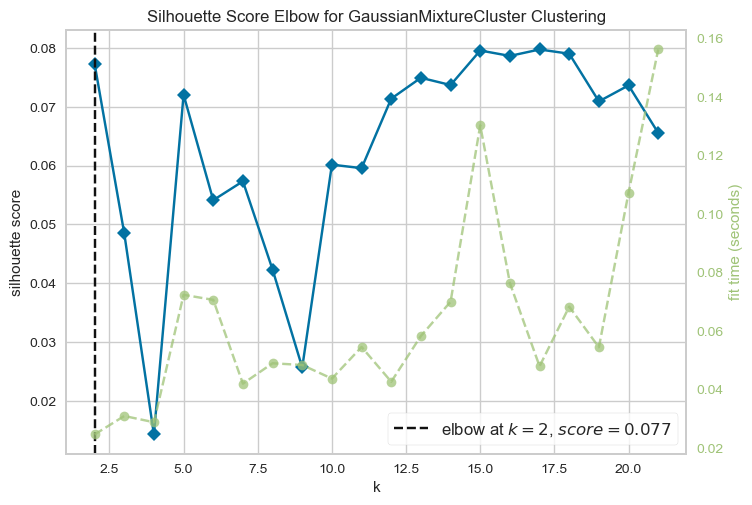

calinski_harabasz


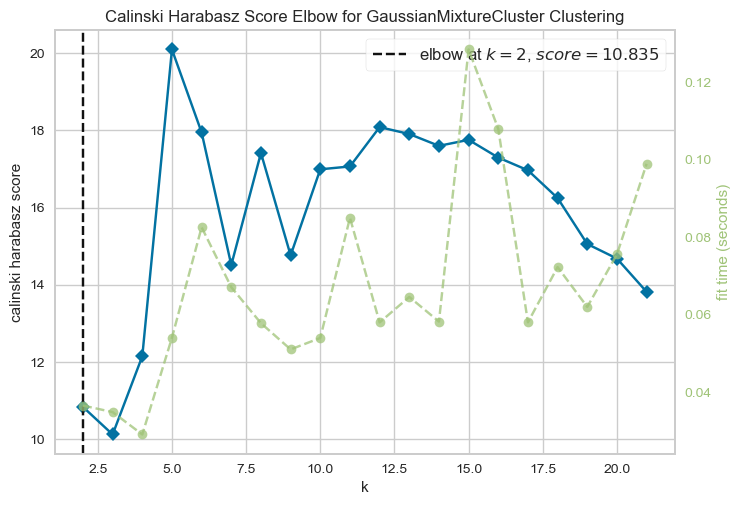

In [159]:

methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(x)
    visualizer.show() #use to only show
    visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
    plt.close()

distortion


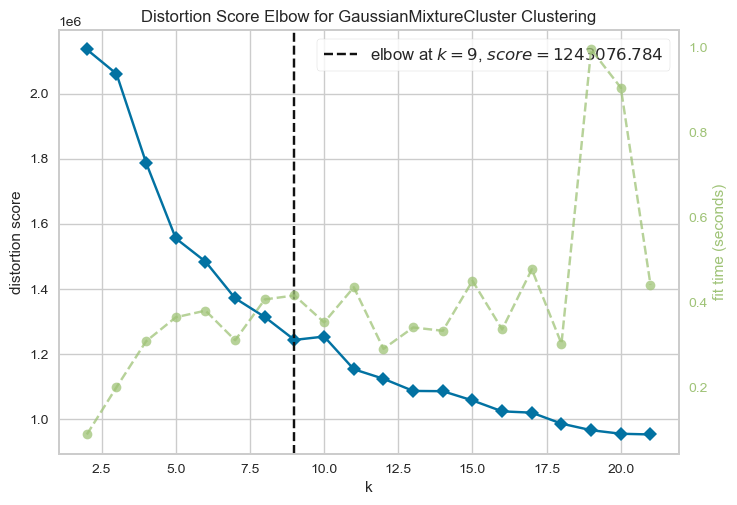

silhouette


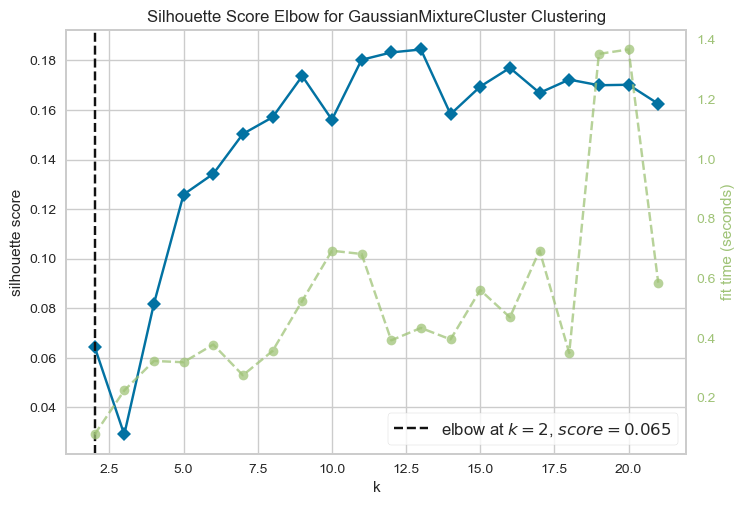

calinski_harabasz


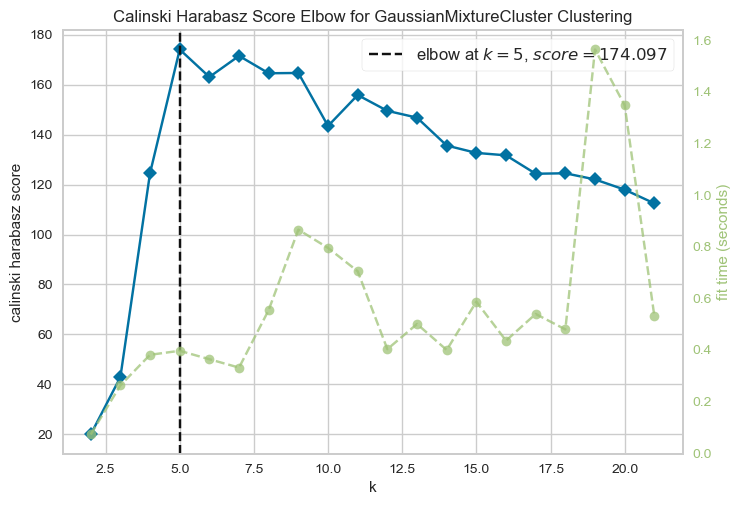

In [161]:

methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=42), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(data)
    visualizer.show() #use to only show
    visualizer.show(outpath=save_folder+"EM_digits_elbow_{}.png".format(i))
    plt.close()

In [165]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    gmm = GaussianMixture(n_components=c).fit(x)
    homo[i] = homogeneity_score(y,gmm.predict(x))
    comp [i] = completeness_score(y,gmm.predict(x))
    adjust_mut_info[i] = ami(y,gmm.predict(x))
    



20it [00:01, 13.63it/s]


Text(0, 0.5, 'Score')

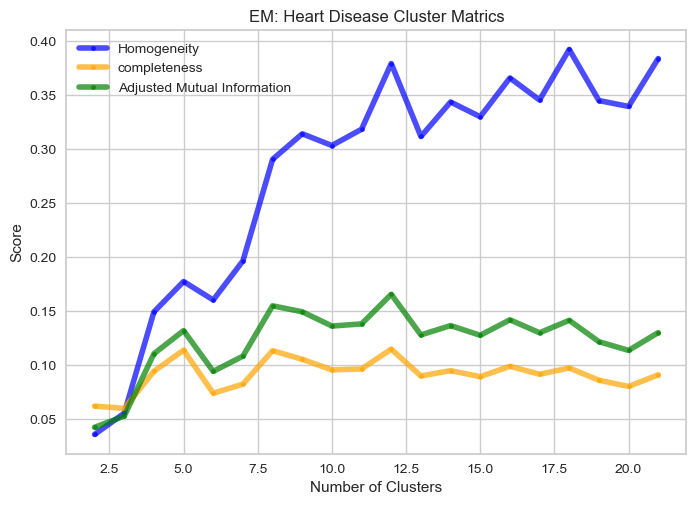

In [166]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("EM: Heart Disease Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

In [168]:
clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    gmm = GaussianMixture(n_components=c).fit(data)
    homo[i] = homogeneity_score(y_data,gmm.predict(data))
    comp [i] = completeness_score(y_data,gmm.predict(data))
    adjust_mut_info[i] = ami(y_data,gmm.predict(data))
    



20it [00:11,  1.71it/s]


Text(0, 0.5, 'Score')

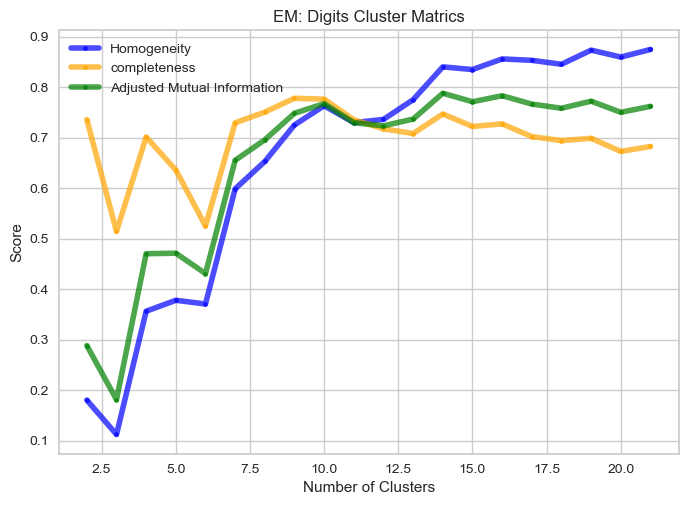

In [169]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("EM: Digits Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

## Dimensionality reduction 

## PCA

## Dataset: Heart Disease

Elapsed time:  0.0010044574737548828


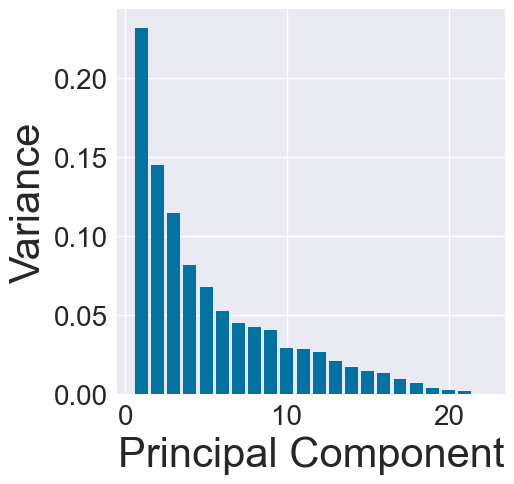

In [15]:
start = time.time()
pca = PCA()
pca.fit(x)
print("Elapsed time: ", time.time() - start)

plt.figure(figsize=(5,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component", fontsize=30)
plt.ylabel("Variance", fontsize=30)
plt.tick_params(labelsize = 20)
# plt.savefig("graphs_DR/wine_PCA_variance.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0, 0.5, 'SSE')

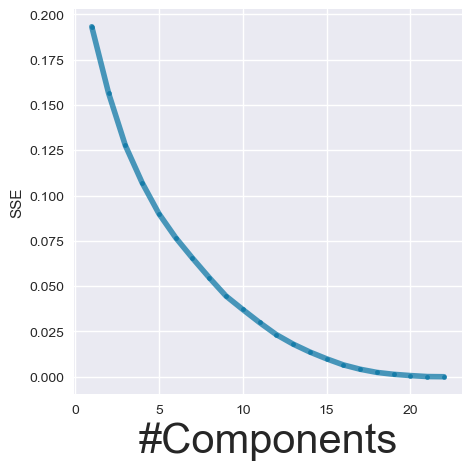

In [73]:
n_components = np.arange(1,23)
results = np.zeros(len(n_components))
for i,n in enumerate(n_components):
    pca = PCA(n_components=n)
    X_transformed = pca.fit(x).transform(x)
    results[i] = mean_squared_error(pca.inverse_transform(X_transformed), x)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components", fontsize=30)
plt.ylabel("SSE")
# plt.savefig("graphs_DR/wine_PCA_SSE.png", pad_inches = 0.01,  bbox_inches = 'tight')

Text(0.5, 1.0, 'Heart Disease PCA Variance ')

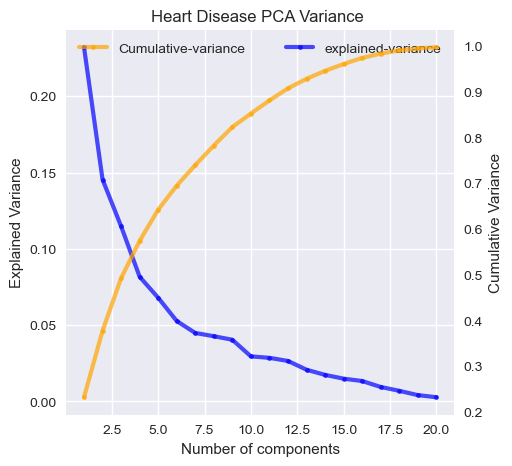

In [68]:
n = 20
pca = PCA(n_components=n).fit(x)

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(range(1,n+1),pca.explained_variance_ratio_,marker='.', linewidth=3, alpha=0.7,color='blue',label='explained-variance')
ax1.legend(loc='best')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Number of components')
ax2 = ax1.twinx()
ax2.plot(range(1,n+1),np.cumsum(pca.explained_variance_ratio_),color = 'orange',label='Cumulative-variance',marker='.', linewidth=3, alpha=0.7)
ax2.set_ylabel('Cumulative Variance')
ax2.legend(loc='best')
plt.grid()
plt.title("Heart Disease PCA Variance ")
# plt.ylabel('Cumulative explained variance')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


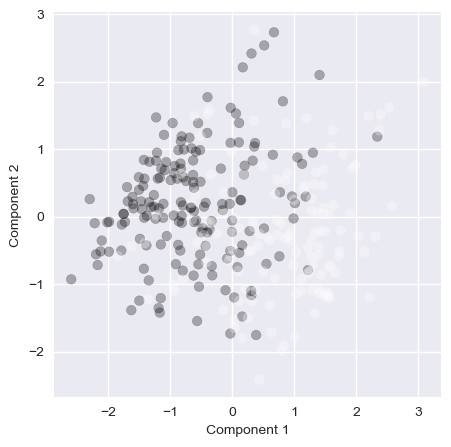

In [28]:
# pca = PCA(n_components = 6).fit(x).transform(x)

# plt.figure(figsize=(5,5))
# plt.scatter(pca[:, 0], pca[:, 1], alpha=0.3, c=y)
# plt.xlabel("Component 1", fontsize=10)
# plt.ylabel("Component 2", fontsize=10)
# # plt.tick_params(labelsize = 20)
# # plt.savefig("graphs_DR/wine_PCA_vis.png", pad_inches = 0.01,  bbox_inches = 'tight')

## Dataset: Heart Disease

Text(0.5, 1.0, 'Digits PCA Variance ')

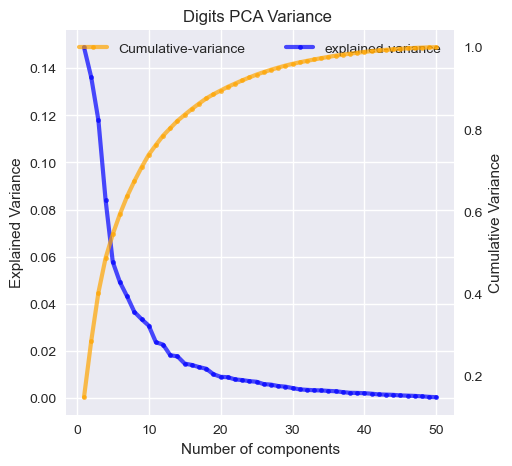

In [69]:
n = 50
pca = PCA(n_components=n).fit(data)

fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(range(1,n+1),pca.explained_variance_ratio_,marker='.', linewidth=3, alpha=0.7,color='blue',label='explained-variance')
ax1.legend(loc='best')
ax1.set_ylabel('Explained Variance')
ax1.set_xlabel('Number of components')
ax2 = ax1.twinx()
ax2.plot(range(1,n+1),np.cumsum(pca.explained_variance_ratio_),color = 'orange',label='Cumulative-variance',marker='.', linewidth=3, alpha=0.7)
ax2.set_ylabel('Cumulative Variance')
ax2.legend(loc='best')
plt.grid()
plt.title("Digits PCA Variance ")
# plt.ylabel('Cumulative explained variance')

Text(0, 0.5, 'SSE')

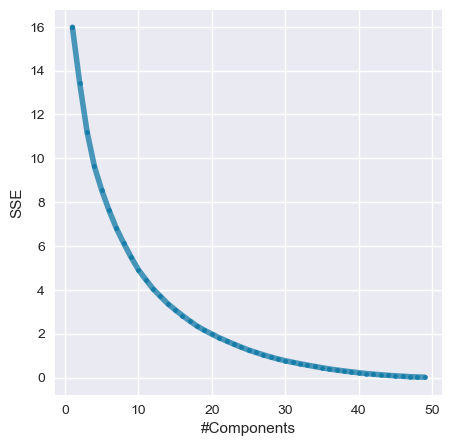

In [75]:
n_components = np.arange(1,50)
results = np.zeros(len(n_components))
for i,n in enumerate(n_components):
    pca = PCA(n_components=n)
    X_transformed = pca.fit(data).transform(data)
    results[i] = mean_squared_error(pca.inverse_transform(X_transformed), data)

plt.figure(figsize=(5,5))
plt.plot(n_components, results,marker='.', linewidth=4, alpha=0.7)
plt.xlabel("#Components")
plt.ylabel("SSE")
# plt.savefig("graphs_DR/wine_PCA_SSE.png", pad_inches = 0.01,  bbox_inches = 'tight')

## ICA

## Heart dataset

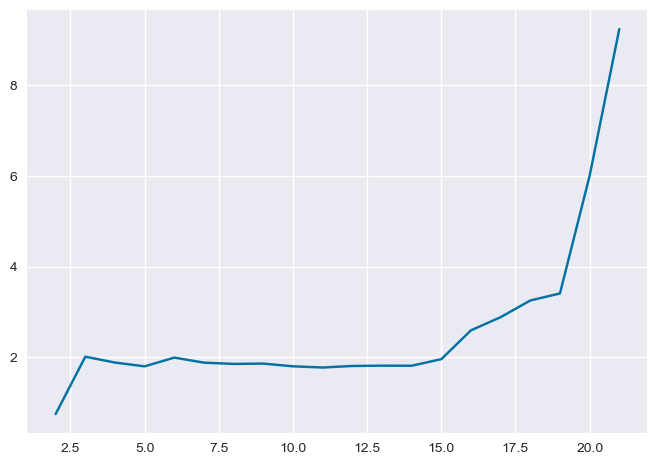

In [13]:
kurt = []
for dim in range(2,x.shape[1]):
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(x)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())

plt.plot(range(2,x.shape[1]),kurt)

Elapsed time:  0.19080591201782227


Text(0, 0.5, 'Kurtosis')

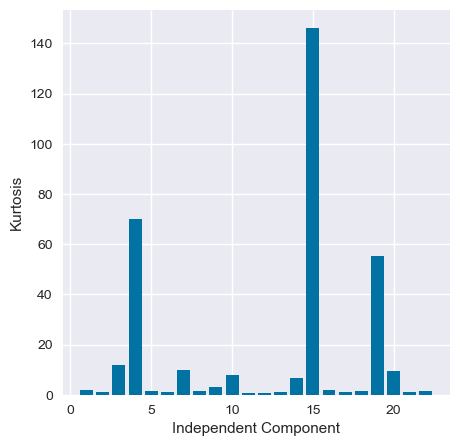

In [37]:
start = time.time()
ica = FastICA()
X_transformed = ica.fit(x).transform(x)
print("Elapsed time: ", time.time() - start)
# order = [-abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]
# X_transformed = X_transformed[:,np.array(order).argsort()]
X_transformed = [abs(kurtosis(X_transformed[:,i])) for i in range(X_transformed.shape[1])]


plt.figure(figsize=(5,5))
plt.bar(range(1, len(X_transformed)+1), X_transformed)
plt.xlabel("Independent Component")
plt.ylabel("Kurtosis")
# plt.tick_params(labelsize = 10)
# plt.savefig("graphs_DR/wine_ICA_kurtosis.png", pad_inches = 0.01,  bbox_inches = 'tight')

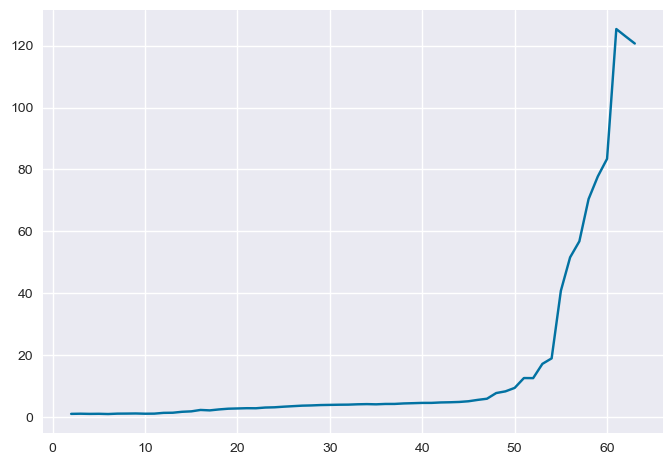

In [18]:
ica = FastICA()
kurt = {}
for d in range (2,64):
    ica.set_params(n_components=d)
    ku = ica.fit_transform(data)
    ku = pd.DataFrame(ku)
    ku = ku.kurt(axis=0)
    kurt[d] = ku.abs().mean()   # for each column, get a kurt score, then get abs mean of them, which is the mean kurt score
kurt = pd.Series(kurt)
# print(kurt.shape)
plt.plot(kurt)

## RP

In [19]:
rp = GaussianRandomProjection(n_components=3)

NameError: name 'GaussianRandomProjection' is not defined